# 4 Supervised Learning - Classification Models

In [2]:
# import the needed libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Set Random Seed for reproducibilty 
np.random.seed(42)


In [3]:
# loading the cleaned Data from 01_data_preprocessing
X = pd.read_csv('../data/cleaned_X.csv')
y = pd.read_csv('../data/clean_y.csv')

In [4]:
# Split the dataset to train and test datasets
# Test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scalling X 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic Regression 

Logistic Regression Model Results:
Accuracy: 0.8833

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



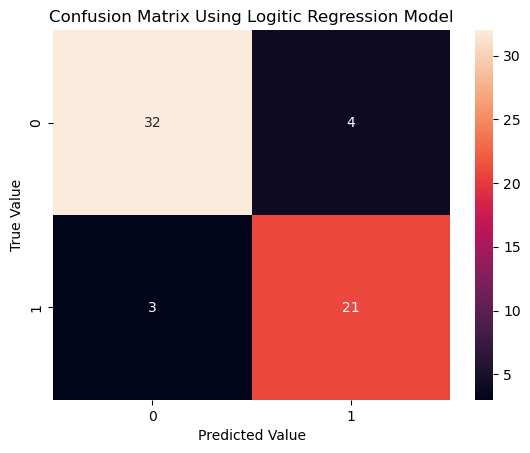

In [5]:
from sklearn.linear_model import LogisticRegression 

# Create and train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train.values.ravel())

# Make Predictions 
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Model 
print('Logistic Regression Model Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')
print('\nClassification Report: ')
print(classification_report(y_test, y_pred_lr))

# Plot the confusion Matrix
# Create Confusion Matrix Object
cm = confusion_matrix(y_test, y_pred_lr)
# Use Heatmap to show results 
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix Using Logitic Regression Model')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()




## Decision Tree 

Decison Tree Model Results:
Accuracy: 0.8167

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        36
           1       0.76      0.79      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



Text(0.5, 1.0, 'Decision Tree Visualization')

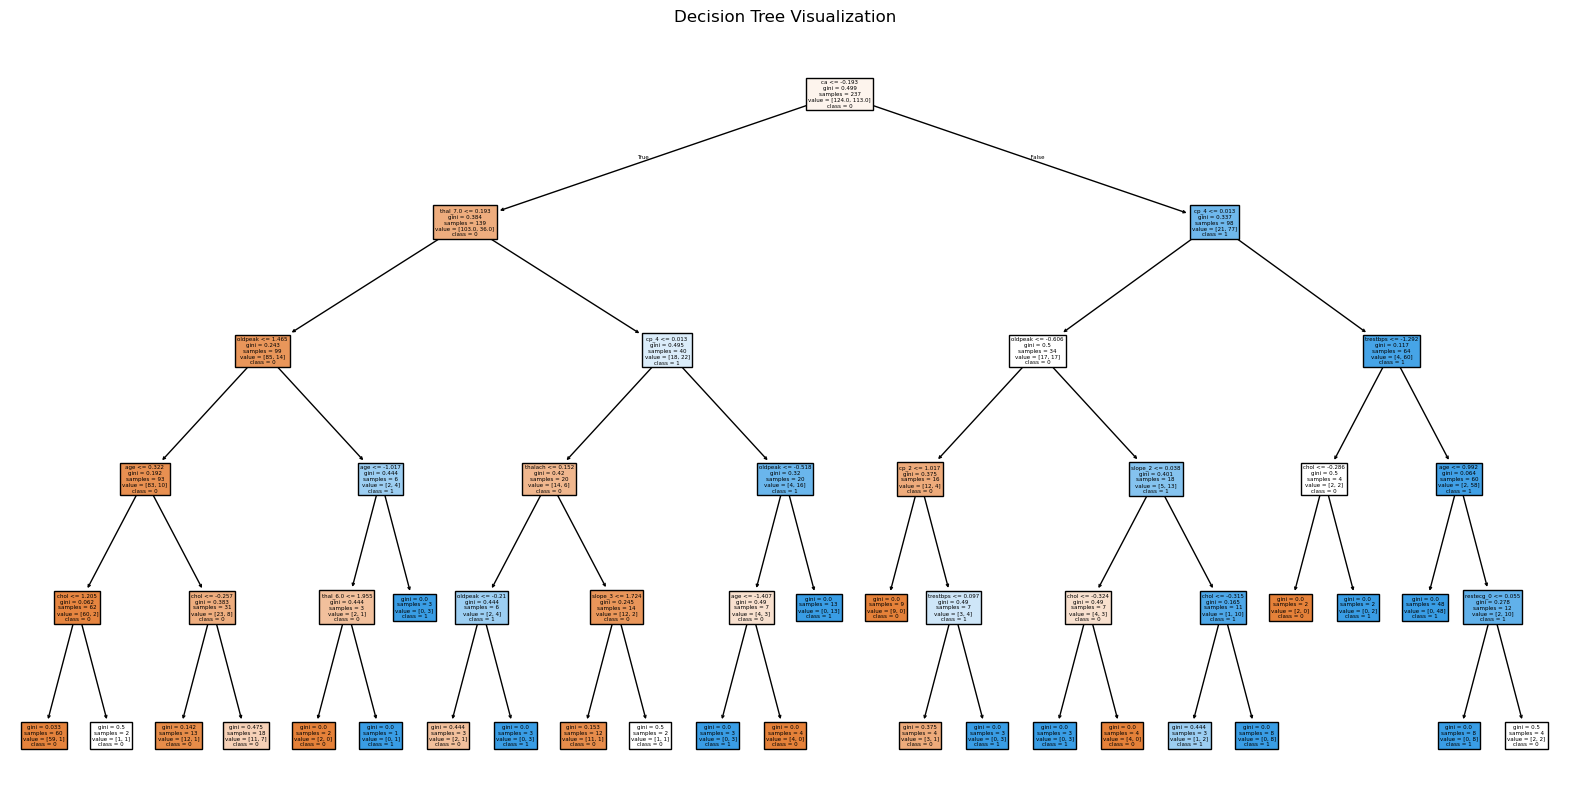

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create and train Decision tree Model 
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate Mode 
print('Decison Tree Model Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns.tolist(),class_names=[str(i) for i in range(len(y))])
plt.title('Decision Tree Visualization')



## Random Forest 

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest Model 
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions 
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Model 
print('Random Forest Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



## Support Vector Machine (SVM)

In [8]:
from sklearn.svm import SVC

# Create and train SVM Model 
svm_model =SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate Model 
print('SVM Model Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}')
print('\nClassification Report: ')
print(classification_report(y_test, y_pred_svm))



SVM Model Results:
Accuracy: 0.900

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.91      0.83      0.87        24

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



In [9]:
# Export the best model accuracy using joblib
import joblib

# Save model
joblib.dump(svm_model, '../models/final_model.pkl')



print('Model is saved ')

Model is saved 


## Train the models in parallel using a Pipeline 


In [17]:
# Import the needed libraries for pipeline 
from sklearn.pipeline import Pipeline 

# We going to train 4 models in the pipeline 
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression())])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42, max_depth=5))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svm = Pipeline([('svm_classifier', SVC(kernel='rbf', random_state=42))])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svm]
pipe_dict = {0 : 'Logistic Regression', 1 : 'Decision Tree', 2: 'Random Forest Classifier',
             3 : 'SVM'}

for pipe in pipelines:
    pipe.fit(X_train_scaled, y_train.values.ravel())

for i,model in enumerate(pipelines):
    pred_test = model.predict(X_test_scaled)
    print(f'\nTest Accuracy: {(pipe_dict[i], model.score(X_test_scaled, y_test))}')
    print(pd.DataFrame({'Acutal': y_test['target'], 'Predicted': pred_test}))    



Test Accuracy: ('Logistic Regression', 0.8833333333333333)
     Acutal  Predicted
167       0          0
211       1          0
63        0          0
154       1          1
5         0          0
77        0          0
183       0          0
158       0          0
9         1          1
139       0          0
285       1          1
78        0          0
92        0          0
101       0          0
42        0          1
222       0          0
283       0          0
33        0          1
263       1          0
148       0          0
245       1          1
45        1          1
60        1          1
46        0          0
278       1          1
237       0          0
175       1          1
234       1          1
17        0          0
279       0          0
111       0          0
219       0          0
24        1          1
82        0          0
7         0          0
75        0          0
108       1          1
84        0          0
90        1          1
73        1         